In [1]:
from google.colab import drive 
import os
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Internship/"
os.chdir(path)

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
import math
import pickle
import datetime

from utilsOT import *
from algos import *

Mounted at /content/drive


In [2]:
n_iter = 50000
list_epsilon = [0,0.001,0.01,0.1]
list_alpha = [0.001,0.002,0.01,0.1]

# v

In [ ]:
for seed in range(0,100):

    if seed % 10 == 0:
        print('============= from '+str(seed)+' to '+str(seed+10)+' =============')

    np.random.seed(seed)

    n_target = np.random.randint(2,20)
    n_source = np.random.randint(2,20)

    rho_list_target = generate_list_rho(3)
    rho_list_source = generate_list_rho(3)

    X_target = sample_rho_batch(rho_list_target,n_target)
    nu = np.random.rand(n_target)
    nu = nu/np.sum(nu) 

    X_source = sample_rho_batch(rho_list_source,n_source)
    mu = np.random.rand(n_source)
    mu = mu/np.sum(mu)

    v1 = np.zeros([n_target,n_iter,len(list_epsilon)])
    v2 = np.zeros([n_source,n_iter,len(list_epsilon)])
    v3 = np.zeros([n_target,n_iter,len(list_epsilon)])

    for i_e in range(len(list_epsilon)):
        t0 = datetime.datetime.now()

        epsilon = list_epsilon[i_e]
        alpha = list_alpha[i_e]

        v1[:,:,i_e] = runSAG(nu,mu,X_target,X_source,epsilon,alpha,n_iter)
        v2[:,:,i_e] = runSAG(mu,mu,X_source,X_source,epsilon,alpha,n_iter)
        v3[:,:,i_e] = runSAG(nu,nu,X_target,X_target,epsilon,alpha,n_iter)
        
        t1 = datetime.datetime.now()
        print('v1, v2, v3, epsilon = '+str(epsilon)+', seed = '+str(seed)+', time = '+str((t1-t0).seconds))
    
    np.save('permanent/result/S_discrete_eps_cst_SAG/v1_seed_'+str(seed)+'.npy',v1)
    np.save('permanent/result/S_discrete_eps_cst_SAG/v2_seed_'+str(seed)+'.npy',v2)
    np.save('permanent/result/S_discrete_eps_cst_SAG/v3_seed_'+str(seed)+'.npy',v3)

============= from 0 to 10 =============
v1, v2, v3, epsilon = 0, seed = 0, time = 131
v1, v2, v3, epsilon = 0.001, seed = 0, time = 8
v1, v2, v3, epsilon = 0.01, seed = 0, time = 8
v1, v2, v3, epsilon = 0.1, seed = 0, time = 8
v1, v2, v3, epsilon = 0, seed = 1, time = 128
v1, v2, v3, epsilon = 0.001, seed = 1, time = 8
v1, v2, v3, epsilon = 0.01, seed = 1, time = 8
v1, v2, v3, epsilon = 0.1, seed = 1, time = 8
v1, v2, v3, epsilon = 0, seed = 2, time = 128
v1, v2, v3, epsilon = 0.001, seed = 2, time = 8
v1, v2, v3, epsilon = 0.01, seed = 2, time = 8
v1, v2, v3, epsilon = 0.1, seed = 2, time = 8
v1, v2, v3, epsilon = 0, seed = 3, time = 129
v1, v2, v3, epsilon = 0.001, seed = 3, time = 8
v1, v2, v3, epsilon = 0.01, seed = 3, time = 8
v1, v2, v3, epsilon = 0.1, seed = 3, time = 9
v1, v2, v3, epsilon = 0, seed = 4, time = 130
v1, v2, v3, epsilon = 0.001, seed = 4, time = 8
v1, v2, v3, epsilon = 0.01, seed = 4, time = 8
v1, v2, v3, epsilon = 0.1, seed = 4, time = 8
v1, v2, v3, epsilon = 0,

# W, S

In [ ]:
for seed in range(0,100):

    if seed % 10 == 0:
        print('============= from '+str(seed)+' to '+str(seed+10)+' =============')

    np.random.seed(seed)

    n_target = np.random.randint(2,20)
    n_source = np.random.randint(2,20)

    rho_list_target = generate_list_rho(3)
    rho_list_source = generate_list_rho(3)

    X_target = sample_rho_batch(rho_list_target,n_target)
    nu = np.random.rand(n_target)
    nu = nu/np.sum(nu) 

    X_source = sample_rho_batch(rho_list_source,n_source)
    mu = np.random.rand(n_source)
    mu = mu/np.sum(mu)

    W1 = np.zeros([n_iter,len(list_epsilon)])
    W2 = np.zeros([n_iter,len(list_epsilon)])
    W3 = np.zeros([n_iter,len(list_epsilon)])

    v1 = np.load('permanent/result/S_discrete_eps_cst_SAG/v1_seed_'+str(seed)+'.npy')
    v2 = np.load('permanent/result/S_discrete_eps_cst_SAG/v2_seed_'+str(seed)+'.npy')
    v3 = np.load('permanent/result/S_discrete_eps_cst_SAG/v3_seed_'+str(seed)+'.npy')

    t0 = datetime.datetime.now()
    for i_e in range(len(list_epsilon)):
        epsilon = list_epsilon[i_e]
        for i in range(n_iter):
            W1[i,i_e] = W_sd(v1[:,i,i_e],X_source,X_target,mu,nu,epsilon)
            W2[i,i_e] = W_sd(v2[:,i,i_e],X_source,X_source,mu,mu,epsilon)
            W3[i,i_e] = W_sd(v3[:,i,i_e],X_target,X_target,nu,nu,epsilon)
    t1 = datetime.datetime.now()
    print('seed = '+str(seed)+', time = '+str((t1-t0).seconds))
    
    np.save('permanent/result/S_discrete_eps_cst_SAG/W1_seed_'+str(seed)+'.npy',W1)
    np.save('permanent/result/S_discrete_eps_cst_SAG/W2_seed_'+str(seed)+'.npy',W2)
    np.save('permanent/result/S_discrete_eps_cst_SAG/W3_seed_'+str(seed)+'.npy',W3)

    S = W1 - 1/2 * ( W2 + W3 )
    np.save('permanent/result/S_discrete_eps_cst_SAG/S_seed_'+str(seed)+'.npy',S)

============= from 0 to 10 =============
seed = 0, time = 318
seed = 1, time = 219
seed = 2, time = 290
seed = 3, time = 147
seed = 4, time = 200
seed = 5, time = 245
seed = 6, time = 225
seed = 7, time = 194
seed = 8, time = 283
seed = 9, time = 152
============= from 10 to 20 =============
seed = 10, time = 153
seed = 11, time = 372
seed = 12, time = 193
seed = 13, time = 279
seed = 14, time = 270
seed = 15, time = 252
seed = 16, time = 285
seed = 17, time = 366
seed = 18, time = 173
seed = 19, time = 162
============= from 20 to 30 =============
seed = 20, time = 259
seed = 21, time = 299
seed = 22, time = 223
seed = 23, time = 186
seed = 24, time = 95
seed = 25, time = 269
seed = 26, time = 291
seed = 27, time = 305
seed = 28, time = 114
seed = 29, time = 148
============= from 30 to 40 =============
seed = 30, time = 139
seed = 31, time = 175
seed = 32, time = 180
seed = 33, time = 115
seed = 34, time = 178
seed = 35, time = 299
seed = 36, time = 101
seed = 37, time = 286
seed = 3

# error

In [ ]:
W1_all = np.zeros((100,n_iter,len(list_epsilon)))
W2_all = np.zeros((100,n_iter,len(list_epsilon)))
W3_all = np.zeros((100,n_iter,len(list_epsilon)))
S_all = np.zeros((100,n_iter,len(list_epsilon)))
error_W1_all = np.zeros((100,n_iter,len(list_epsilon)))
error_W2_all = np.zeros((100,n_iter,len(list_epsilon)))
error_W3_all = np.zeros((100,n_iter,len(list_epsilon)))
error_S_all = np.zeros((100,n_iter,len(list_epsilon)))

for seed in range(100):
    W1_all[seed, :, :] = np.load('permanent/result/S_discrete_eps_cst_SAG/W1_seed_'+str(seed)+'.npy')
    W2_all[seed, :, :] = np.load('permanent/result/S_discrete_eps_cst_SAG/W2_seed_'+str(seed)+'.npy')
    W3_all[seed, :, :] = np.load('permanent/result/S_discrete_eps_cst_SAG/W3_seed_'+str(seed)+'.npy')
    S_all[seed, :, :] = np.load('permanent/result/S_discrete_eps_cst_SAG/S_seed_'+str(seed)+'.npy')

    W1_theo = np.load('permanent/result/W_theo_discrete/W1_theo_seed_'+str(seed)+'.npy')
    W2_theo = np.load('permanent/result/W_theo_discrete/W2_theo_seed_'+str(seed)+'.npy')
    W3_theo = np.load('permanent/result/W_theo_discrete/W3_theo_seed_'+str(seed)+'.npy')

    error_W1_all[seed, :, :] = W1_all[seed, :, :].copy() - W1_theo
    error_W2_all[seed, :, :] = W2_all[seed, :, :].copy() - W2_theo
    error_W3_all[seed, :, :] = W3_all[seed, :, :].copy() - W3_theo
    error_S_all[seed, :, :] = S_all[seed, :, :].copy() - W1_theo


In [ ]:
np.save('permanent/result/S_discrete_eps_cst_SAG/error_W1_all.npy',error_W1_all)
np.save('permanent/result/S_discrete_eps_cst_SAG/error_W2_all.npy',error_W2_all)
np.save('permanent/result/S_discrete_eps_cst_SAG/error_W3_all.npy',error_W3_all)
np.save('permanent/result/S_discrete_eps_cst_SAG/error_S_all.npy',error_S_all)

# plot W, S error

In [6]:
error_W1_all = np.load('permanent/result/S_discrete_eps_cst_SAG/error_W1_all.npy')
error_W2_all = np.load('permanent/result/S_discrete_eps_cst_SAG/error_W2_all.npy')
error_W3_all = np.load('permanent/result/S_discrete_eps_cst_SAG/error_W3_all.npy')

In [8]:
error_W1_average_all = error_W1_all.mean(axis = 0)
error_W2_average_all = error_W2_all.mean(axis = 0)
error_W3_average_all = error_W3_all.mean(axis = 0)
np.save('permanent/result/S_discrete_eps_cst_SAG/error_W1_average_all.npy',error_W1_average_all)
np.save('permanent/result/S_discrete_eps_cst_SAG/error_W2_average_all.npy',error_W2_average_all)
np.save('permanent/result/S_discrete_eps_cst_SAG/error_W3_average_all.npy',error_W3_average_all)

In [4]:
error_S_all = np.load('permanent/result/S_discrete_eps_cst_SAG/error_S_all.npy')
error_S_average_all = error_S_all.mean(axis = 0)
np.save('permanent/result/S_discrete_eps_cst_SAG/error_S_average_all.npy',error_S_average_all)

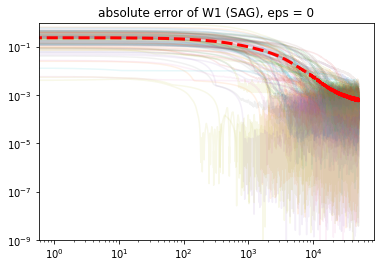

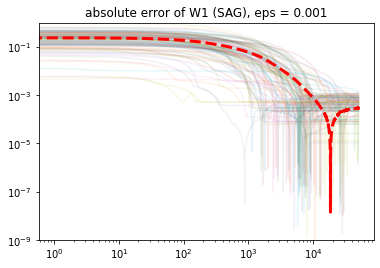

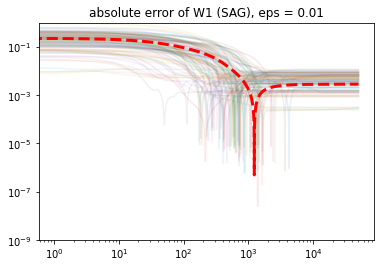

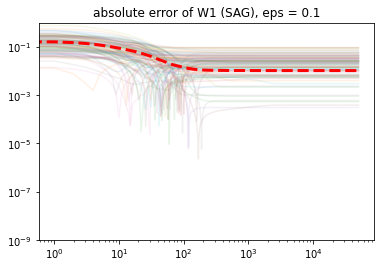

In [10]:
for i_e in range(len(list_epsilon)):
    epsilon = list_epsilon[i_e]
    plt.figure()
    for seed in range(100):
        plt.plot(np.abs(error_W1_all[seed,:,i_e]), alpha=0.1)
    plt.plot(np.abs(error_W1_average_all[:,i_e]), alpha=1,linestyle = '--', linewidth = 3, color = 'red')
    plt.title('absolute error of W1 (SAG), eps = '+str(epsilon))
    plt.ylim((10**(-9),10**(0)))
    plt.yscale('log')
    plt.xscale('log')
    plt.savefig('permanent/figure/S_discrete_eps_cst_SAG/error_W1_eps_'+str(epsilon)+'.png')
    plt.show()
    plt.close()

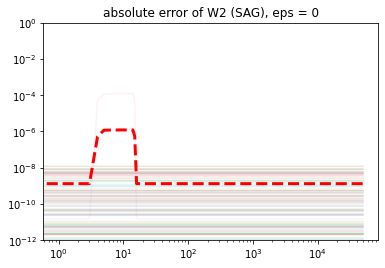

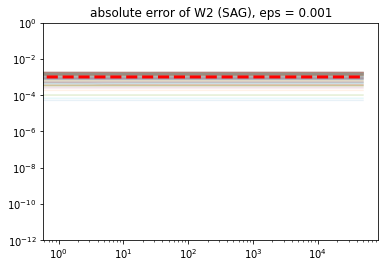

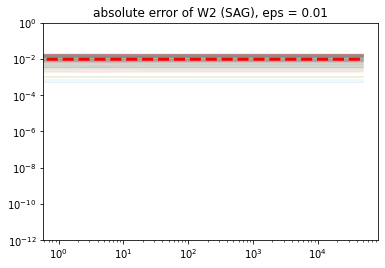

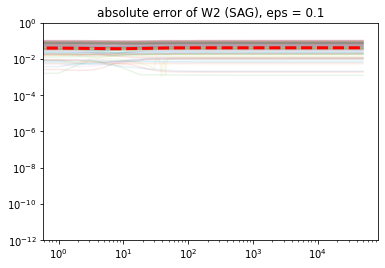

In [15]:
for i_e in range(len(list_epsilon)):
    epsilon = list_epsilon[i_e]
    plt.figure()
    for seed in range(100):
        plt.plot(np.abs(error_W2_all[seed,:,i_e]), alpha=0.1)
    plt.plot(np.abs(error_W2_average_all[:,i_e]), alpha=1,linestyle = '--', linewidth = 3, color = 'red')
    plt.ylim((10**(-12),10**(0)))
    plt.title('absolute error of W2 (SAG), eps = '+str(epsilon))
    plt.yscale('log')
    plt.xscale('log')
    plt.savefig('permanent/figure/S_discrete_eps_cst_SAG/error_W2_eps_'+str(epsilon)+'.png')
    plt.show()
    plt.close()

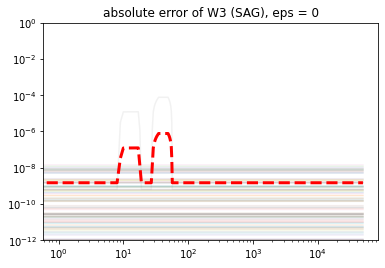

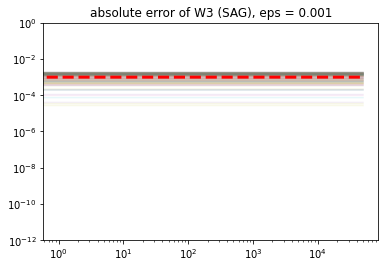

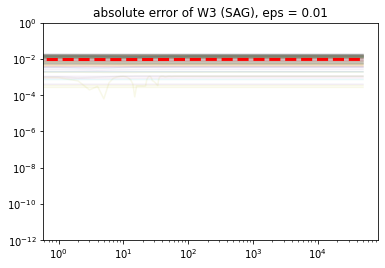

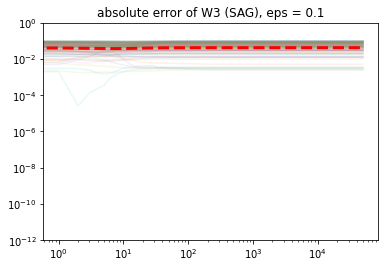

In [16]:
for i_e in range(len(list_epsilon)):
    epsilon = list_epsilon[i_e]
    plt.figure()
    for seed in range(100):
        plt.plot(np.abs(error_W3_all[seed,:,i_e]), alpha=0.1)
    plt.plot(np.abs(error_W3_average_all[:,i_e]), alpha=1,linestyle = '--', linewidth = 3, color = 'red')
    plt.title('absolute error of W3 (SAG), eps = '+str(epsilon))
    plt.ylim((10**(-12),10**(0)))
    plt.yscale('log')
    plt.xscale('log')
    plt.savefig('permanent/figure/S_discrete_eps_cst_SAG/error_W3_eps_'+str(epsilon)+'.png')
    plt.show()
    plt.close()

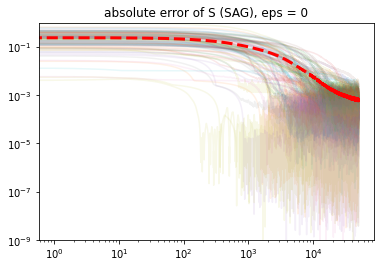

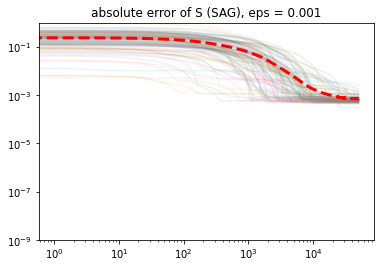

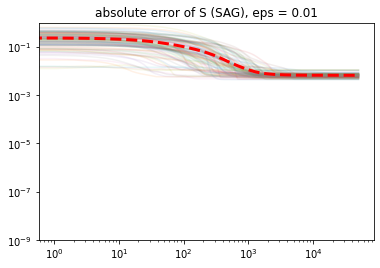

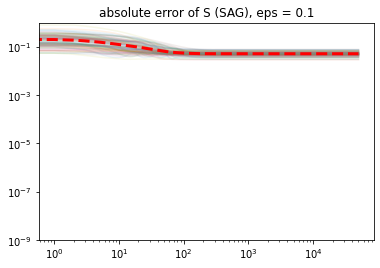

In [17]:
for i_e in range(len(list_epsilon)):
    epsilon = list_epsilon[i_e]
    plt.figure()
    for seed in range(100):
        plt.plot(np.abs(error_S_all[seed,:,i_e]), alpha=0.1)
    plt.plot(np.abs(error_S_average_all[:,i_e]), alpha=1,linestyle = '--', linewidth = 3, color = 'red')
    plt.ylim((10**(-9),10**(0)))
    plt.title('absolute error of S (SAG), eps = '+str(epsilon))
    plt.yscale('log')
    plt.xscale('log')
    plt.savefig('permanent/figure/S_discrete_eps_cst_SAG/error_S_eps_'+str(epsilon)+'.png')
    plt.show()
    plt.close()

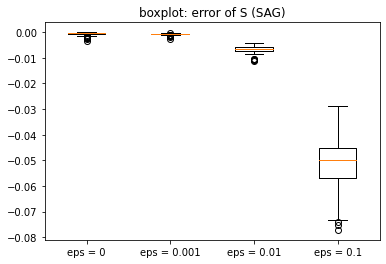

In [ ]:
plt.figure()
plt.boxplot(error_S_all[:,-1,:],labels=['eps = 0','eps = 0.001','eps = 0.01', 'eps = 0.1'])
plt.title('boxplot: error of S (SAG)')
plt.savefig('permanent/figure/S_discrete_eps_cst_SAG/error_S_boxplot.png')
plt.show()
plt.close()

In [ ]:
from statsmodels.graphics.gofplots import qqplot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


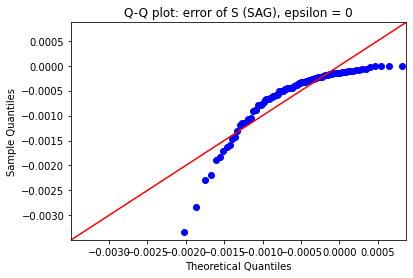

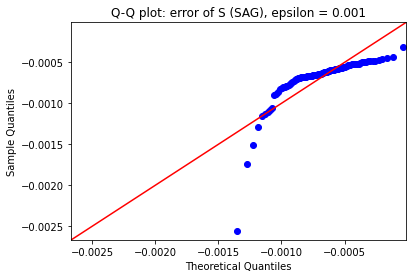

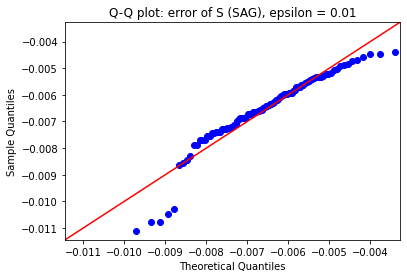

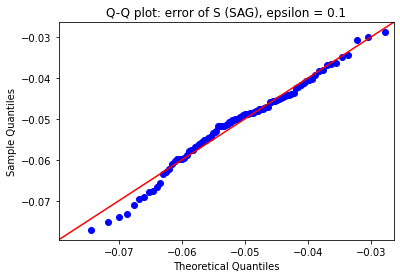

In [ ]:
for i_e in range(len(list_epsilon)):
    epsilon = list_epsilon[i_e] 
    std = np.std(error_S_all[:,-1,i_e])
    mean = np.mean(error_S_all[:,-1,i_e])
    fig = qqplot(error_S_all[:,-1,i_e], line='45', loc = mean, scale = std)
    plt.title('Q-Q plot: error of S (SAG), epsilon = '+str(epsilon))
    plt.savefig('permanent/figure/S_discrete_eps_cst_SAG/error_S_eps_'+str(epsilon)+'_qqplot.png')
    plt.show()
    plt.close()

# S Regret

In [19]:
regret_S_all = (error_S_all**2).cumsum(axis = 1)
np.save('permanent/result/S_discrete_eps_cst_SAG/regret_S_all.npy',regret_S_all)

In [20]:
regret_S_average_all = regret_S_all.mean(axis = 0)
np.save('permanent/result/S_discrete_eps_cst_SAG/regret_S_average_all.npy',regret_S_average_all)

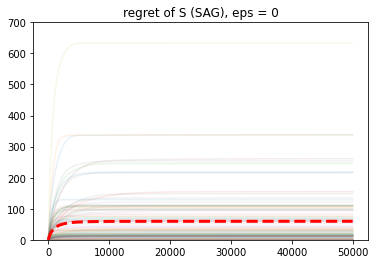

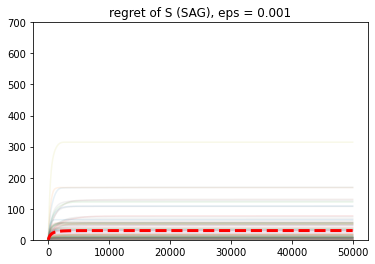

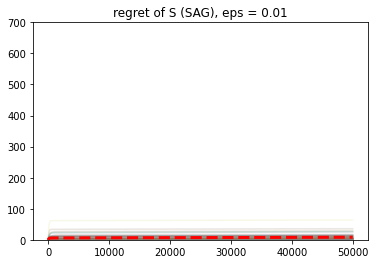

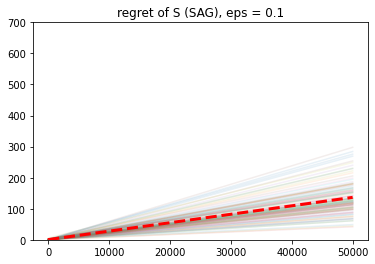

In [21]:
for i_e in range(len(list_epsilon)):
    epsilon = list_epsilon[i_e]
    plt.figure()
    for seed in range(100):
        plt.plot(regret_S_all[seed,:,i_e], alpha=0.1)
    plt.plot(regret_S_average_all[:,i_e], alpha=1,linestyle = '--', linewidth = 3, color = 'red')
    plt.ylim((0,700))
    plt.title('regret of S (SAG), eps = '+str(epsilon))
    plt.savefig('permanent/figure/S_discrete_eps_cst_SAG/regret_S_non_log_eps_'+str(epsilon)+'.png')
    plt.show()
    plt.close()

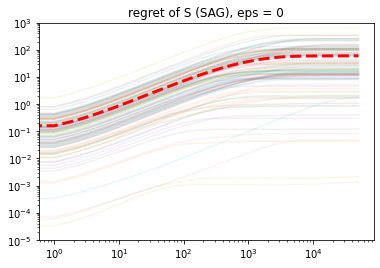

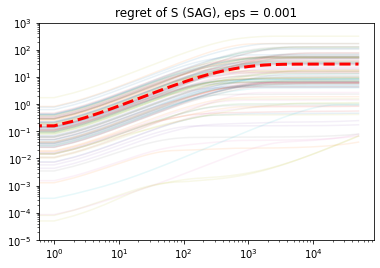

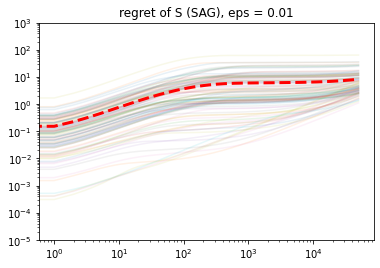

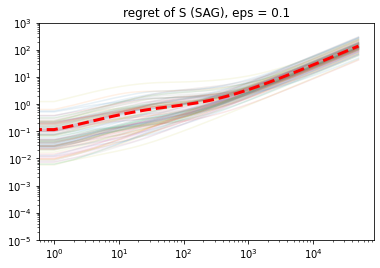

In [23]:
for i_e in range(len(list_epsilon)):
    epsilon = list_epsilon[i_e]
    plt.figure()
    for seed in range(100):
        plt.plot(regret_S_all[seed,:,i_e], alpha=0.1)
    plt.plot(regret_S_average_all[:,i_e], alpha=1,linestyle = '--', linewidth = 3, color = 'red')
    plt.ylim((10**(-5),10**(3)))
    plt.title('regret of S (SAG), eps = '+str(epsilon))
    plt.yscale('log')
    plt.xscale('log')
    plt.savefig('permanent/figure/S_discrete_eps_cst_SAG/regret_S_eps_'+str(epsilon)+'.png')
    plt.show()
    plt.close()